Basic Analysis for wine_review data from Kaggle

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('winemag-data_first150k.csv')

In [3]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
# forward fill
data = data.ffill(axis=None, inplace=False, limit=None, downcast=None)

In [5]:
data.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,150930.000000
mean,75464.500000,87.888418,33.508262
std,43569.882402,3.222392,36.187923
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,25.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [6]:
# country with maximum average price
groups = data.groupby('country').mean()
groups['price'].idxmax()

'US-France'

In [7]:
# country with maximum average points
groups = data.groupby('country').mean()
groups['points'].idxmax()

'England'

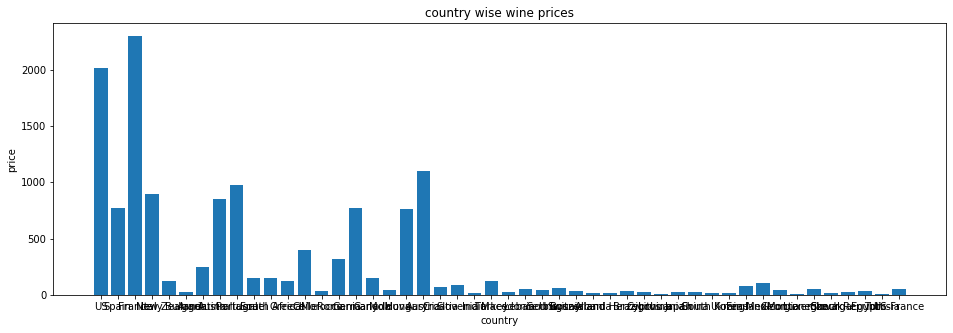

In [10]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(16,5))
plt.bar(data['country'],data['price'], align = 'center')
plt.title('country wise wine prices')
plt.xlabel('country')
plt.ylabel('price')
plt.show()

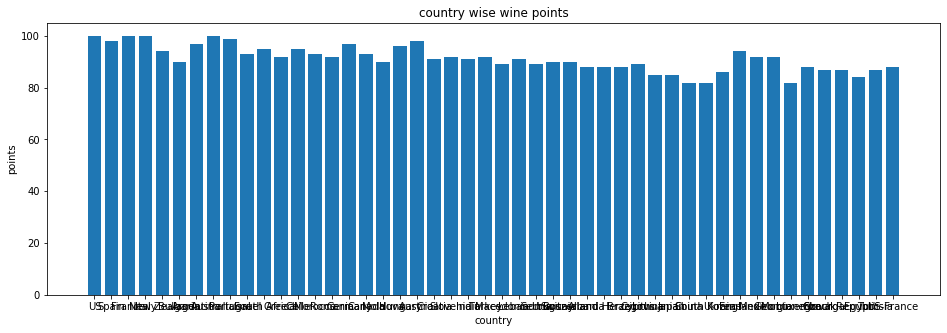

In [18]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(16,5))
plt.bar(data['country'],data['points'], align = 'center')
plt.title('country wise wine points')
plt.xlabel('country')
plt.ylabel('points')
plt.show()

Text(0, 0.5, 'frequency')

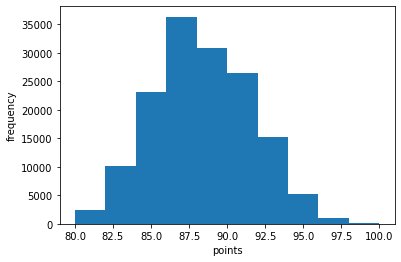

In [11]:
# point frequency plot
plt.hist(data['points'])
plt.xlabel('points')
plt.ylabel('frequency')

In [12]:
# Name of the wine variety with highest average point
groups1 = data.groupby('variety').mean()
groups1['points'].idxmax()

'Cabernet-Shiraz'

In [14]:
groups1.head()

,Unnamed: 0,points,price
variety,,,
Agiorgitiko,87502.366667,85.483333,19.066667
Aglianico,64992.965300,88.545741,32.252366
Aidani,42479.000000,82.000000,27.000000
Airen,69085.333333,81.333333,8.833333
Albana,73637.235294,89.941176,40.470588


In [15]:
# Name of the wine variety with highest average price
groups2 = data.groupby('variety').mean()
groups2['price'].idxmax()

'Cabernet-Shiraz'

In [37]:
# costliest wine variety 
data[data.price == data.price.max()].variety

34920    Bordeaux-style Red Blend
Name: variety, dtype: object

In [38]:
# wine vareity with maximum points
data[data.points == data.points.max()].variety

2145      Bordeaux-style White Blend
19354                          Syrah
19355                         Muscat
24151                         Merlot
26296                     Chardonnay
28954                      Red Blend
41521                         Merlot
51886                     Chardonnay
78004                      Red Blend
83536                     Chardonnay
84034                          Syrah
84035                         Muscat
89399             Cabernet Sauvignon
92916             Cabernet Sauvignon
98647                     Pinot Noir
111087              Prugnolo Gentile
114272                Cabernet Blend
119194                         Syrah
119195                        Muscat
119521                        Merlot
122767                    Pinot Noir
137099            Cabernet Sauvignon
138867              Prugnolo Gentile
143522                Cabernet Blend
Name: variety, dtype: object